# Setup

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

Time series data consists of observations collected at specific time intervals (daily, weekly, monthly, etc.). Unlike traditional cross-sectional data, time series have temporal ordering, and the sequence of observations matters. This ordering allows us to look for patterns such as trends, seasonal effects, or cycles over time.

In [2]:
# Load the Bitcoin dataset
df = pd.read_csv("bitcoin_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time Series Index

**Why Set a Datetime Index?**

By converting a column to a Datetime format and setting it as the DataFrame index, we gain access to powerful time-based functionality. This allows us to:

* Use resampling (e.g., converting daily data to weekly or monthly).
* Slice data by date ranges (e.g., df.loc['2021'] to get data for 2021).
* Extract date-related features (e.g., day of week, month, year).


In [ ]:
# Convert the "Date" column to a datetime object using the format YYYY-MM-DD.
# This step ensures that Pandas recognizes the values as dates, enabling time series functionality.
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Set "Date" as the index of the dataframe. This transforms the DataFrame into a time series,
# where the rows can be accessed and manipulated using date-based indexing.
df.set_index("Date", inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
# Example of selecting data for a specific date:
df.loc['2021-11-09']

,2021-11-09
Open,6.754973e+04
High,6.853034e+04
Low,6.638206e+04
Close,6.697183e+04
Adj Close,6.697183e+04
Volume,4.235799e+10


In [ ]:
# Another way: read the CSV and directly set the index with parse_dates = True.
# This is often more concise when reading files directly.
df1 = pd.read_csv("bitcoin_price.csv", index_col="Date", parse_dates=True)
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


**Resampling**

Definition: Resampling aggregates the time series data from a higher frequency to a lower frequency (or vice versa).

Example: Switching from daily data to weekly or monthly data using df.resample("W").max() or df.resample("M").mean() can help reduce noise and reveal underlying trends more clearly.

In [ ]:
# Resample the data on a weekly (W) basis and return the maximum values in each weekly window.
# Useful for reducing high-frequency data into weekly summaries.
df.resample("W").max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-21,465.864014,468.174011,452.421997,457.334015,457.334015,37919700
2014-09-28,435.751007,441.557007,421.131989,435.790985,435.790985,45099500
2014-10-05,387.427002,391.378998,380.779999,386.944000,386.944000,83308096
2014-10-12,364.687012,382.726013,356.144012,378.549011,378.549011,83641104
2014-10-19,400.954987,411.697998,391.324005,400.869995,400.869995,38491500
...,...,...,...,...,...,...
2023-12-03,39472.207031,40135.605469,39298.164062,39978.390625,39978.390625,23512784002
2023-12-10,44180.019531,44705.515625,43627.597656,44166.601562,44166.601562,39856129827
2023-12-17,43792.019531,43808.375000,41767.089844,43023.972656,43023.972656,40632672038


# Exploratory Data Analysis

**Rolling (Moving) Averages**

**Purpose**: A rolling average (or moving average) smooths out short-term fluctuations and helps highlight longer-term trends or cycles.
**Example**: A 7-day rolling average for daily data means each point is the average of the past 7 days, reducing volatility and noise.

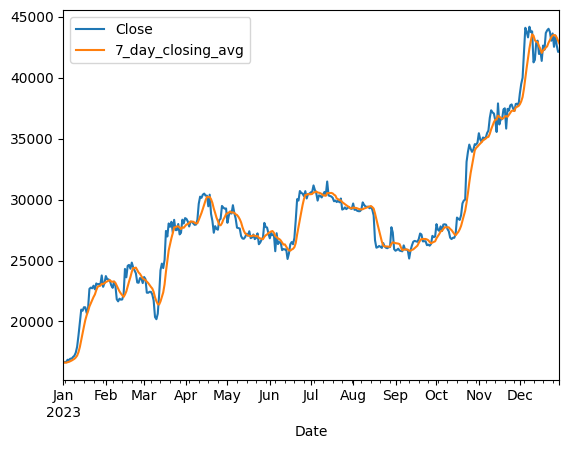

In [ ]:
# Generate a 7-day rolling average of the 'Close' price.
# Rolling averages (moving averages) help smooth out daily fluctuations.
df["7_day_closing_avg"] = df["Close"].rolling(window=7).mean()

# Plot both the daily 'Close' price and the 7-day rolling average for the year 2023.
# This visual comparison shows how smoothing reduces day-to-day noise.
df[["Close", "7_day_closing_avg"]].loc["2023"].plot()
plt.show()

In [ ]:
# Find the month-end date ("ME") with the highest average closing price.
# 'idxmax()' returns the date corresponding to the maximum average.
df.resample("ME").mean()["Close"].idxmax()

Timestamp('2021-11-30 00:00:00')

In [ ]:
# Preview the last 5 rows to check final entries and any newly created columns.
df.tail()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg
Date,,,,,,,
2023-12-26,43599.847656,43603.175781,41676.488281,42520.402344,42520.402344,30026850982,43486.929688
2023-12-27,42518.468750,43683.160156,42167.582031,43442.855469,43442.855469,25260941032,43457.016183
2023-12-28,43468.199219,43804.781250,42318.550781,42627.855469,42627.855469,22992093014,43279.688058
2023-12-29,42614.644531,43124.324219,41424.062500,42099.402344,42099.402344,26000021055,43008.473772
2023-12-30,42091.753906,42584.125000,41556.226562,42156.902344,42156.902344,16013925945,42782.382254


In [ ]:
# Compute the daily percentage change in 'Close' price multiplied by 100.
# This shows the day-over-day return rate in percentage terms.
df["daily_returns_100%"] = df['Close'].pct_change() * 100

In [ ]:
# Identify any days with more than a 10% change (absolute value).
# This flags significant volatility in the price data.
df[abs(df["daily_returns_100%"]) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


# Data Visualization

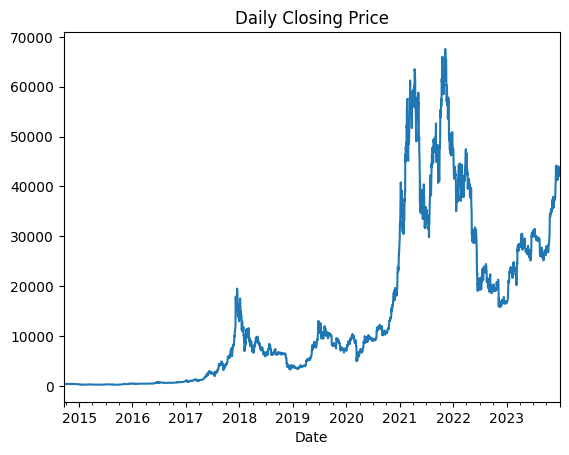

In [ ]:
# Simple plot of the Bitcoin daily closing price.
df["Close"].plot(title="Daily Closing Price")
plt.show()

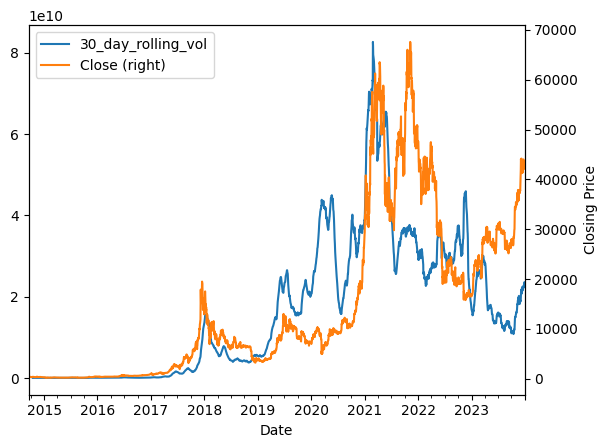

In [ ]:
# Create a variable for the 30-day rolling average of 'Volume'.
# This helps track long-term changes in trading volume.
df["30_day_rolling_vol"] = df["Volume"].rolling(window=30).mean()

# Plot the 30-day rolling volume on the default axis.
# Then plot the 'Close' price on a secondary y-axis to compare their movements visually.
df[["30_day_rolling_vol"]].plot(legend=True)
ax = df["Close"].plot(secondary_y=True, legend=True)
ax.set_ylabel("Closing Price")
plt.show()

**Correlation in Time Series**

**Pearson Correlation**: Measures linear correlation between two continuous variables. However, if time series have trends, Pearson correlation might be inflated or misleading.

**Spearman Correlation**: Measures the rank correlation, which can be more robust to outliers and non-normal distributions.

**Why caution?** In time series, data points are not independent (autocorrelation), and simple correlations can be deceptive if not interpreted carefully.

In [ ]:
# Perform (Pearson) correlation between the 30-day rolling volume and the Closing price.
# Pearson correlation for time series can be misleading due to non-stationarity or trends,
# but it's a quick metric to see raw association.
print(df["30_day_rolling_vol"].corr(df["Close"]))

# Display the correlation matrix. Diagonals are always 1.
df[["Close", "30_day_rolling_vol"]].corr()

0.750445379618605


,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


* Note: For time series, methods like Spearman correlation can sometimes be more robust
* if the data are not normally distributed or contain outliers.

# Data Manipulation

In [ ]:
# Check for missing values in each column. This is crucial for time series,
# as many models cannot handle missing data directly.
df.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
7_day_closing_avg,6
daily_returns_100%,1
30_day_rolling_vol,29


**Dealing with Missing Values**

`bfill()`: Uses the next valid observation to fill the gap, ideal when you assume that the next known value is a good proxy for the missing one.

**Interpolation**: Tries to estimate missing values based on known data points (linear interpolation, spline, etc.). This is often useful when the data changes in a predictable manner between observations.

In [ ]:
# Fill missing values in the "30_day_rolling_vol" column with the next valid observation (bfill).
# If day 29 is missing, it takes day 30's value. This ensures no NaNs remain.
df["30_day_rolling_vol"] = df["30_day_rolling_vol"].bfill()

In [ ]:
# Interpolate missing values in the "7_day_closing_avg" column linearly.
# This calculates intermediate values for any gaps.
df["7_day_closing_avg"] = df["7_day_closing_avg"].interpolate(method="linear")

In [ ]:
# Check the day of week (Monday=0, Sunday=6) for each date index.
df.index.dayofweek

Index([2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       ...
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5],
      dtype='int32', name='Date', length=3392)

In [ ]:
# Extract various time components as separate columns for potential feature engineering.
# This is often useful for capturing seasonality or day-of-week effects in models.
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day
df["day_of_week"] = df.index.dayofweek
df["weekday"] = df.index.day_name()
df["weekday_numeric"] = df.index.weekday

# Create a boolean flag for weekend (Saturday=5, Sunday=6).
df["is_weekend"] = df["weekday_numeric"].isin([5, 6])
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,True


**Feature Engineering: Lagged Values**

**Lagged Features**: Creating df["lag_1"] or df["lag_2"] helps capture the dependency of current values on previous values. For many time series models (AR, ARIMA), lagged terms are crucial for forecasting.

**Why it matters**: Financial time series (like Bitcoin) often show strong correlation between consecutive days.

In [ ]:
# Create lag features for the 'Close' price.
# "lag_1" shifts the series by 1 day, "lag_2" by 2 days, etc.
# These can help predictive models capture short-term dependencies.
df["lag_1"] = df["Close"].shift(1)
df["lag_2"] = df["Close"].shift(2)
df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_closing_avg,daily_returns_100%,30_day_rolling_vol,year,month,day,day_of_week,weekday,weekday_numeric,is_weekend,lag_1,lag_2
Date,,,,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,2,Wednesday,2,False,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,3,Thursday,3,False,457.334015,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,4,Friday,4,False,424.440002,457.334015
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,5,Saturday,5,True,394.795990,424.440002
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,6,Sunday,6,True,408.903992,394.795990


# Seasonality

Seasonality is a pattern that repeats at regular intervals (e.g., daily, weekly, monthly, quarterly).

**Visualizing Monthly/Quarterly Patterns**: The `month_plot` and `quarter_plot` from `statsmodels` highlight how each month/quarter behaves across multiple years, making recurring patterns more evident.

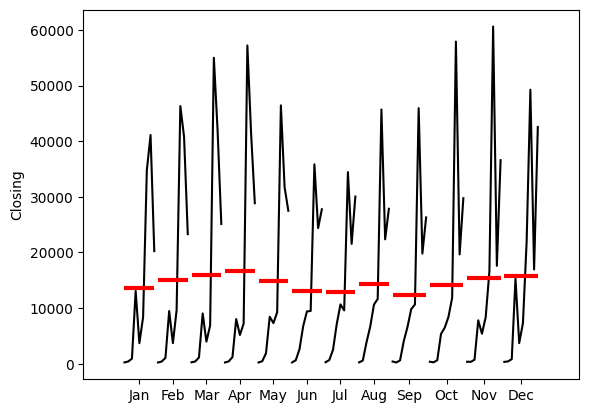

In [ ]:
# Monthly seasonality plot for the 'Close' price, resampled to monthly-end ("ME") mean.
# month_plot displays each month of the year separately, helping visualize seasonal patterns.
month_plot(df['Close'].resample('ME').mean(), ylabel="Closing")
plt.show()

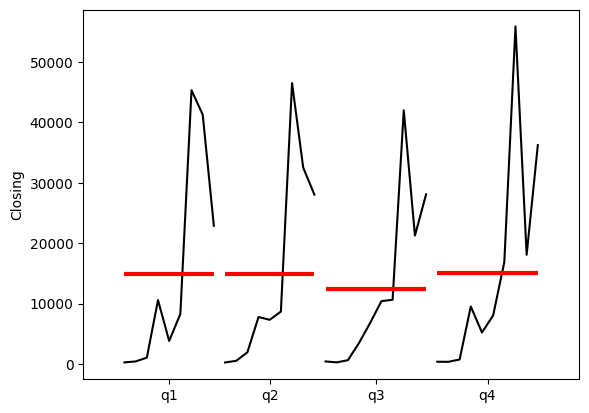

In [ ]:
# Quarterly seasonality plot using quarter_plot.
# The data is resampled at the quarter-end ("QE") and then the mean is plotted by quarter.
quarter_plot(df['Close'].resample('QE').mean(), ylabel="Closing")
plt.show()

In [ ]:
# Load a second dataset of monthly chocolate revenue.
df_choco = pd.read_csv("choco_monthly_revenue.csv", index_col="Month with Year", parse_dates=True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


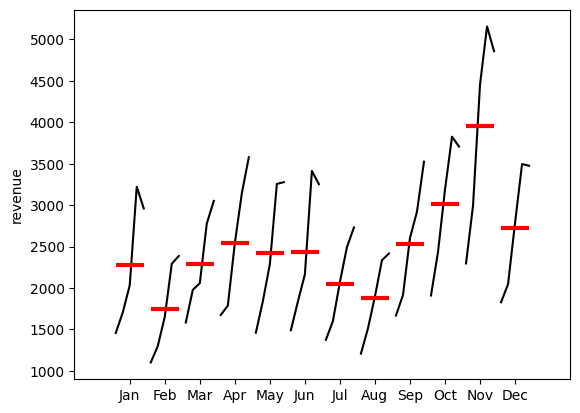

In [ ]:
# Plot monthly seasonality for the 'revenue' column.
# This helps identify any seasonal patterns (e.g., holiday seasons) in chocolate sales.
month_plot(df_choco['revenue'], ylabel="revenue")
plt.show()

Seasonal_decompose only allows 1 seasonality

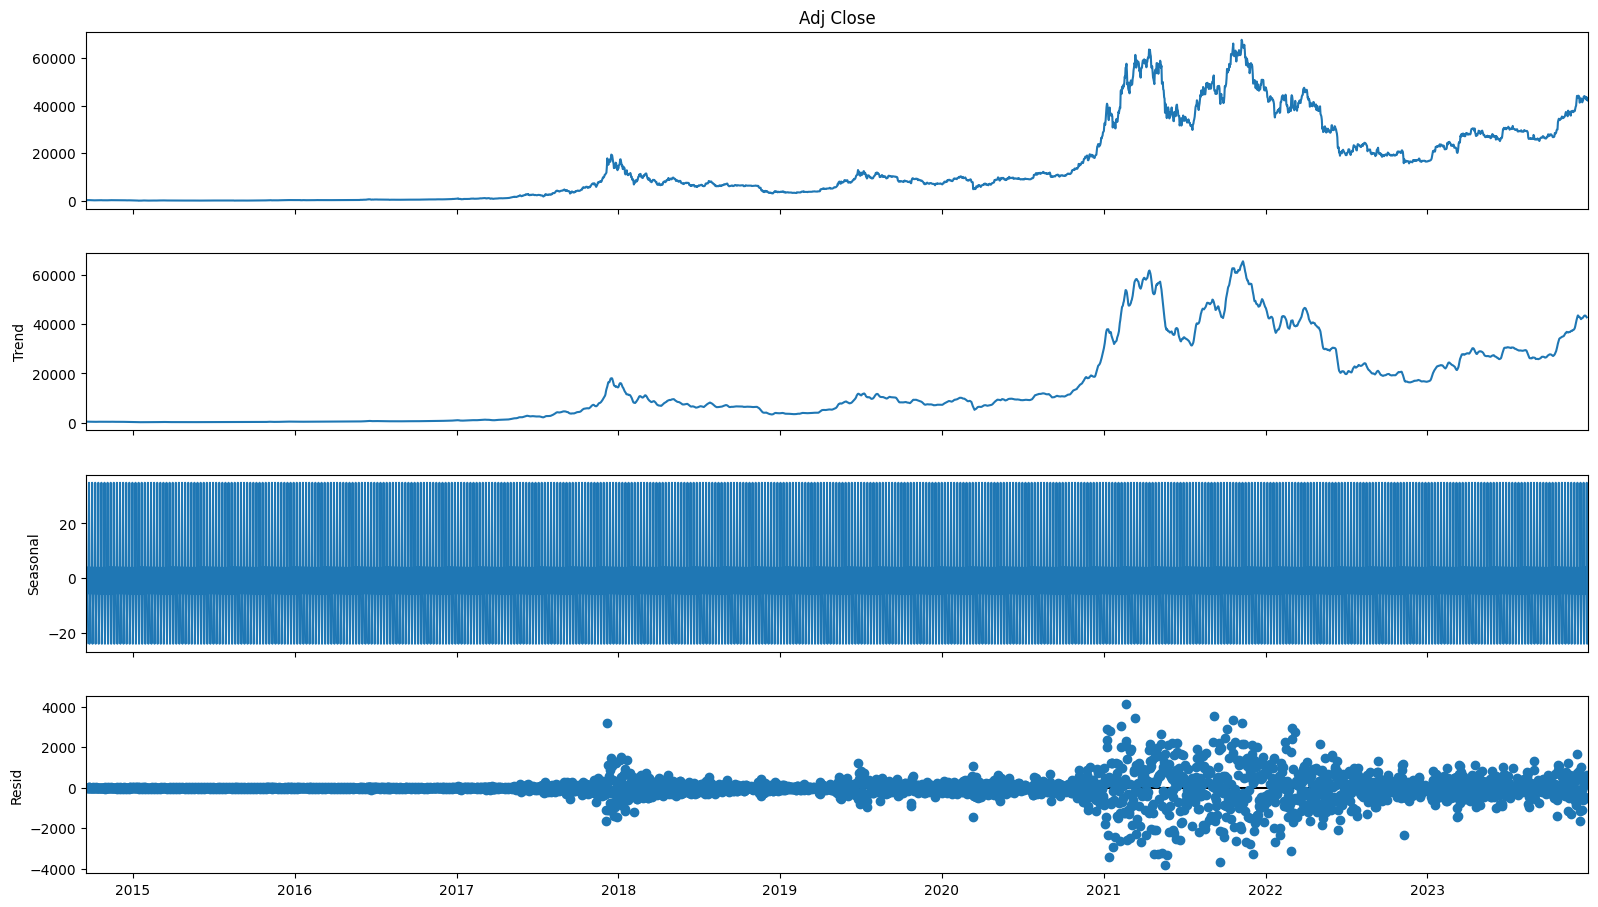

In [ ]:
# 'seasonal_decompose' can only handle one seasonal period at a time.
# Decompose the 'Adj Close' series with a weekly (period=7) additive model.
decomposition = seasonal_decompose(df['Adj Close'],
                                   model='additive',
                                   period=7)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

**Additive vs. Multiplicative Models**:
* Additive: `time_series = trend + seasonality + residual` (suitable when seasonal variations are roughly constant in magnitude).
* Multiplicative: `time_series = trend * seasonality * residual` (suitable when seasonal variations change proportionally with the level of the series).

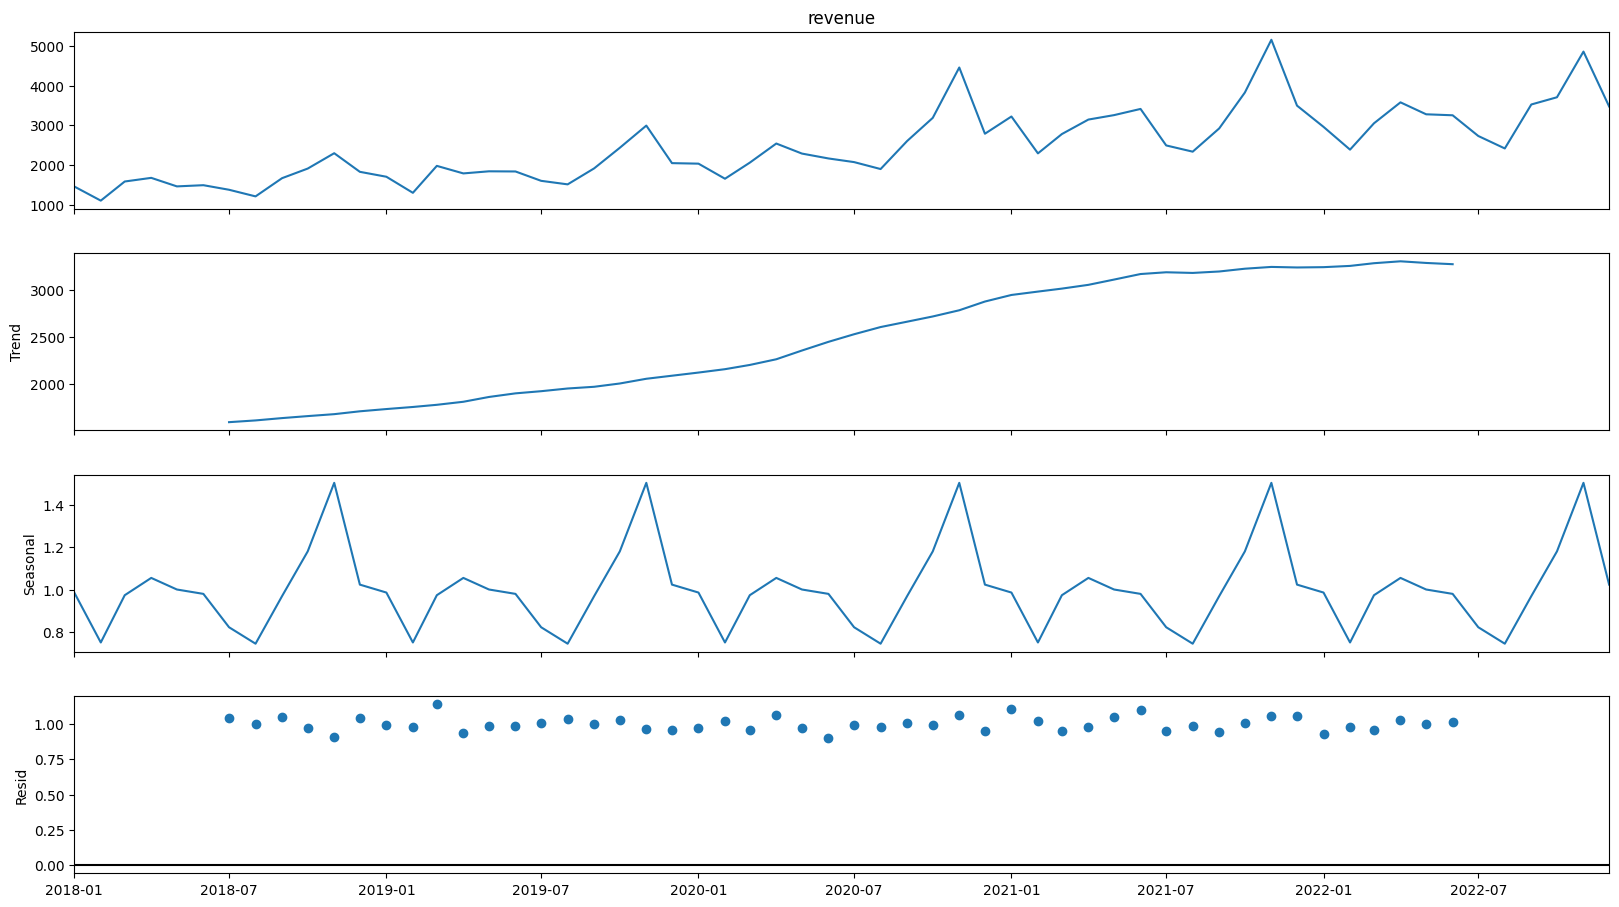

In [ ]:
# Seasonal decomposition for the chocolate revenue with a monthly (period=12) multiplicative model.
decomposition = seasonal_decompose(df_choco['revenue'],
                                   model='multiplicative',
                                   period=12)
fig = decomposition.plot()
fig.set_size_inches(18, 10)
plt.show()

# Auto-Correlation

Autocorrelation Function (ACF) measures how current values correlate with their own past values over different lags. It doesn’t control for intermediate lags.

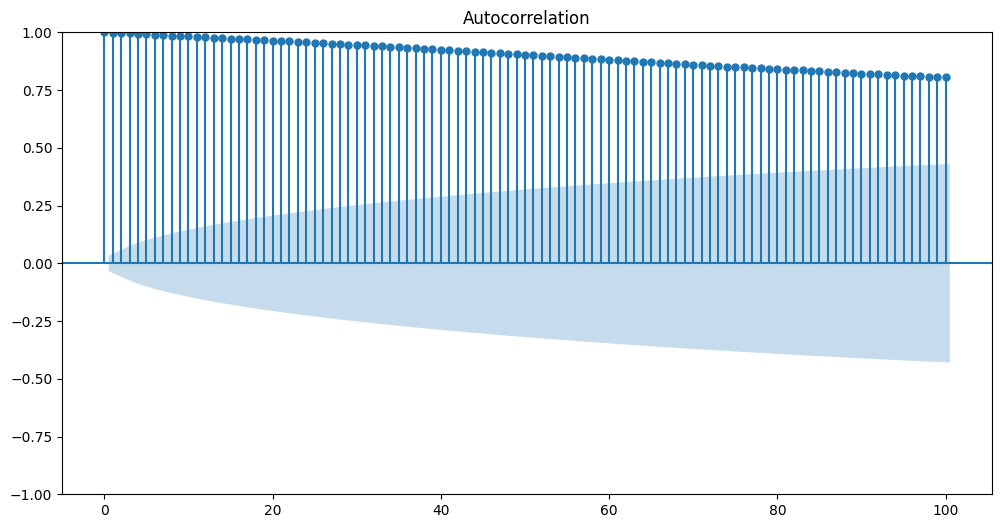

In [ ]:
# Autocorrelation (ACF) measures how current values of a series relate to its own past values.
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df['Adj Close'], lags=100, ax=ax)
plt.show()

In [ ]:
# Check info about df_choco
df_choco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2018-01-01 to 2022-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


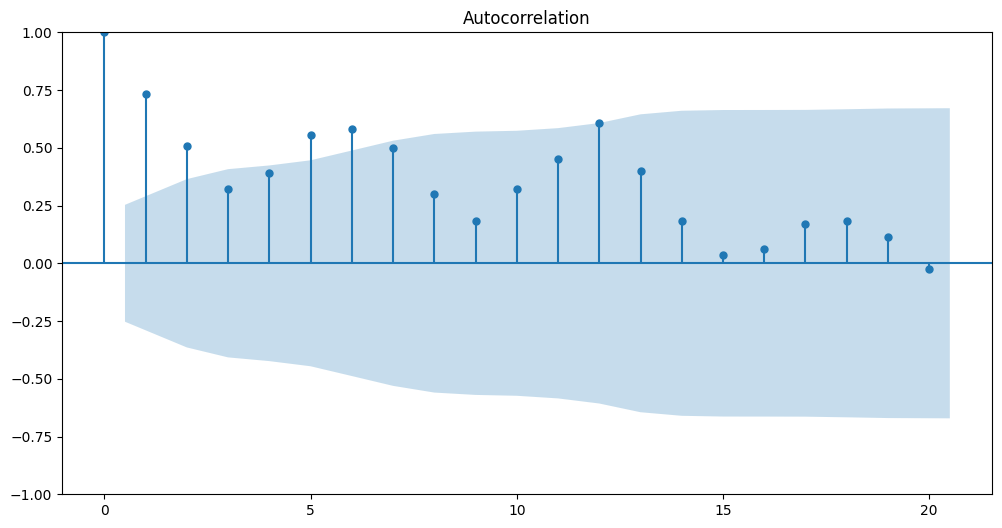

In [ ]:
# Plot the ACF for the chocolate revenue. Lags=20 is enough for monthly data over 1+ year.
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df_choco['revenue'], lags=20, ax=ax)
plt.show()

# Partial Auto-Correlation

Partial Autocorrelation Function (PACF) measures the correlation with a certain lag after removing the effects of shorter lags.


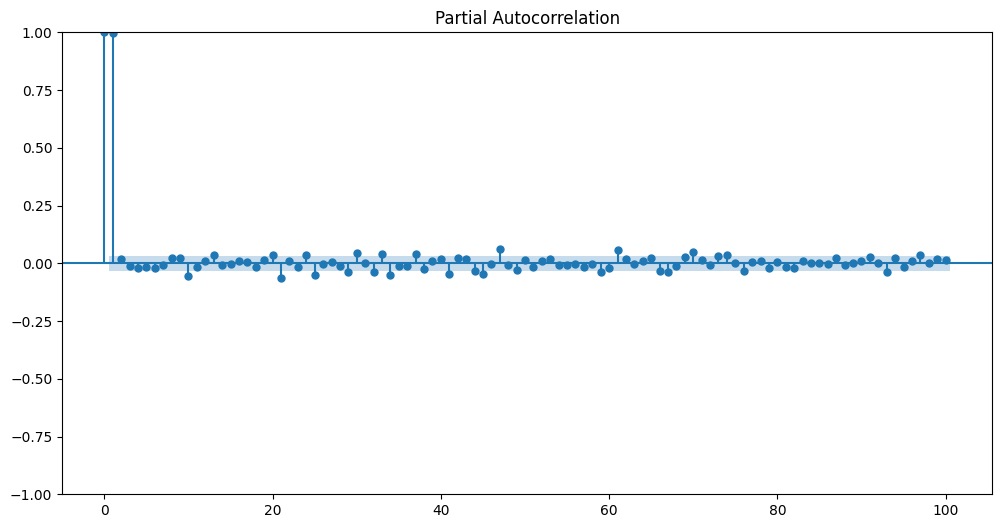

In [ ]:
# PACF explains the correlation of a time series with its own lags after removing the effects of
# intermediate lags. It's useful for identifying which lag(s) still have influence on the current value
# once others are accounted for.
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df['Adj Close'], lags=100, ax=ax)
plt.show()

* Note: Based on PACF for daily data, the most relevant lag is typically the previous day's price.

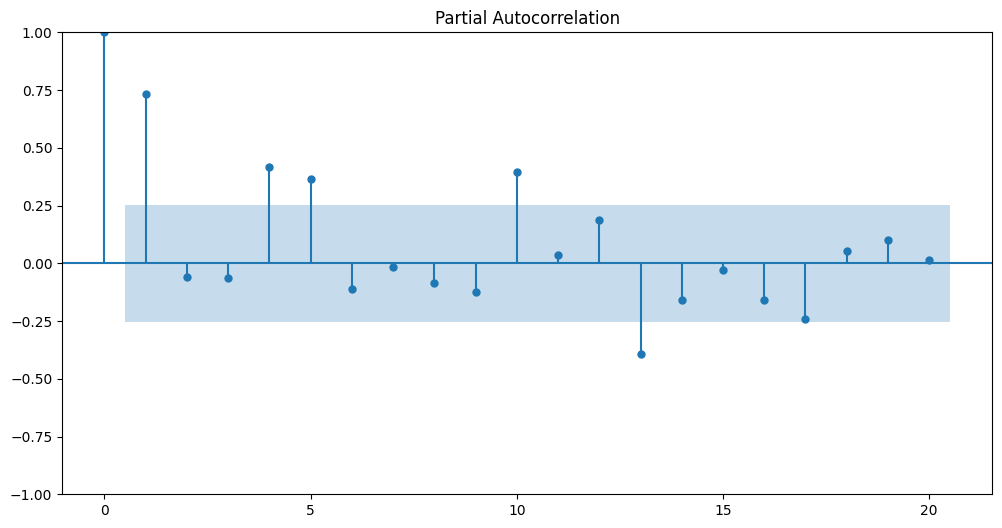

In [ ]:
# PACF for chocolate revenue:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df_choco['revenue'], lags=20, ax=ax)
plt.show()